In [1]:
import numpy as np
import cv2
from skimage.io import imread
import pygast
import matplotlib.pyplot as plt
%matplotlib inline

255


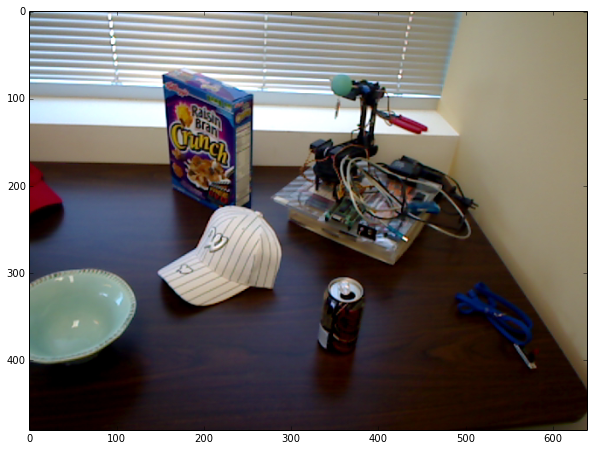

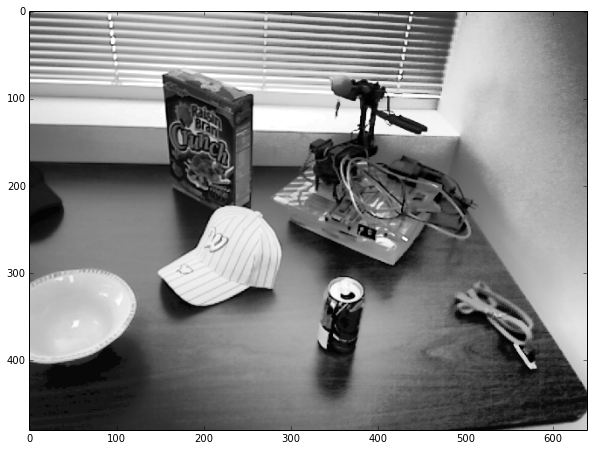

In [44]:
img = imread("/home/jlowens/Downloads/rgbd-scenes/table/table_1/table_1_20.png")
plt.figure(figsize=(10,10))
plt.imshow(img)

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=100.0, tileGridSize=(2,2))
gimg = clahe.apply(gimg)
plt.figure(figsize=(10,10))
plt.imshow(gimg, cmap="gray")
print np.amax(gimg)

In [45]:
sym = pygast.Symmetry()

In [47]:
#gimg2 = cv2.resize(cv2.GaussianBlur(gimg), (320,240))
#gimg3 = cv2.resize(gimg, (160,120))
gimg2 = cv2.pyrDown(gimg, (320,240))
gimg3 = cv2.pyrDown(gimg2, (160,120))
gimg4 = cv2.pyrDown(gimg3, (80,60))

smag = np.zeros(gimg.shape, dtype=np.float32)
sdir = np.zeros(gimg.shape, dtype=np.float32)
smag2 = np.zeros(gimg2.shape, dtype=np.float32)
sdir2 = np.zeros(gimg2.shape, dtype=np.float32)
smag3 = np.zeros(gimg3.shape, dtype=np.float32)
sdir3 = np.zeros(gimg3.shape, dtype=np.float32)
smag4 = np.zeros(gimg4.shape, dtype=np.float32)
sdir4 = np.zeros(gimg4.shape, dtype=np.float32)

%time sym.transform(gimg4, smag4, sdir4, 7)
%time sym.transform(gimg3, smag3, sdir3, 7)
%time sym.transform(gimg2, smag2, sdir2, 7)
%time sym.transform(gimg, smag, sdir, 7)

CPU times: user 3.42 ms, sys: 0 ns, total: 3.42 ms
Wall time: 3.39 ms
CPU times: user 1.97 ms, sys: 4.15 ms, total: 6.13 ms
Wall time: 6.16 ms
CPU times: user 18.4 ms, sys: 0 ns, total: 18.4 ms
Wall time: 18.5 ms
CPU times: user 53.6 ms, sys: 15.9 ms, total: 69.4 ms
Wall time: 69.6 ms


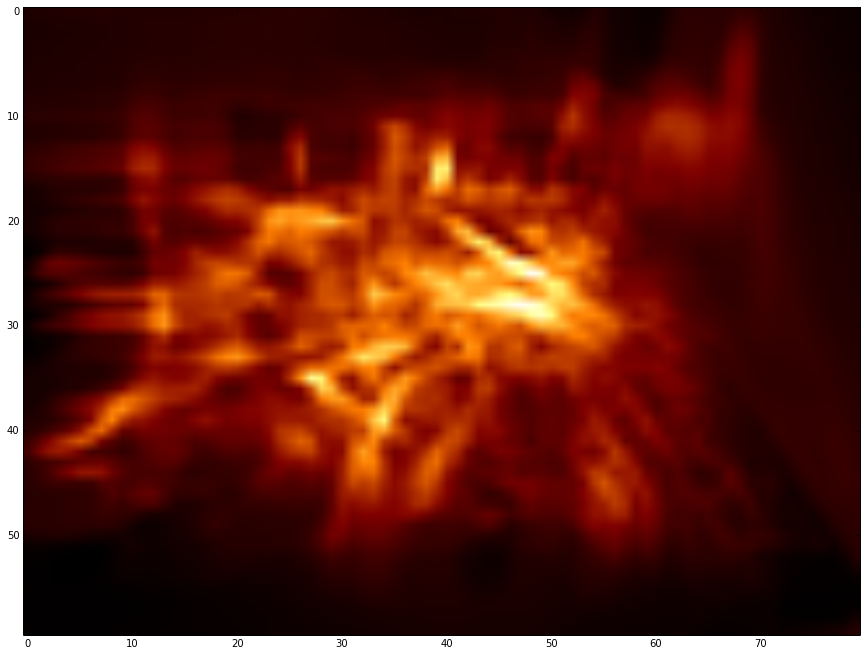

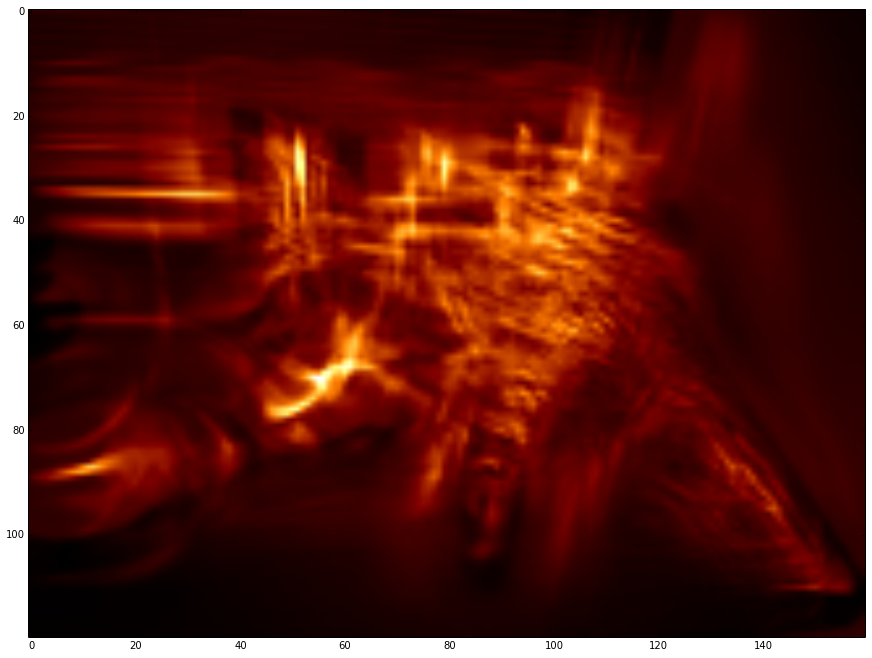

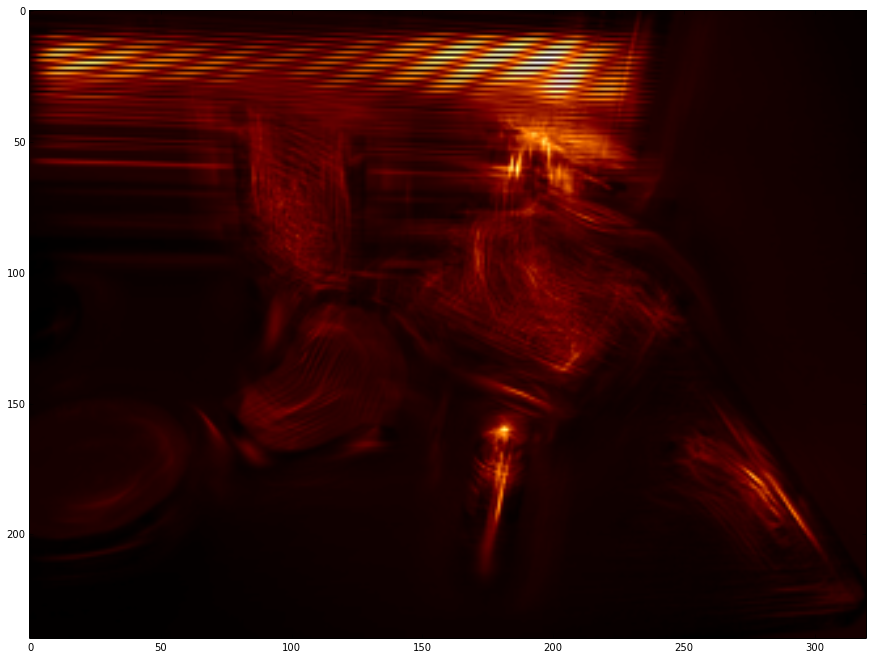

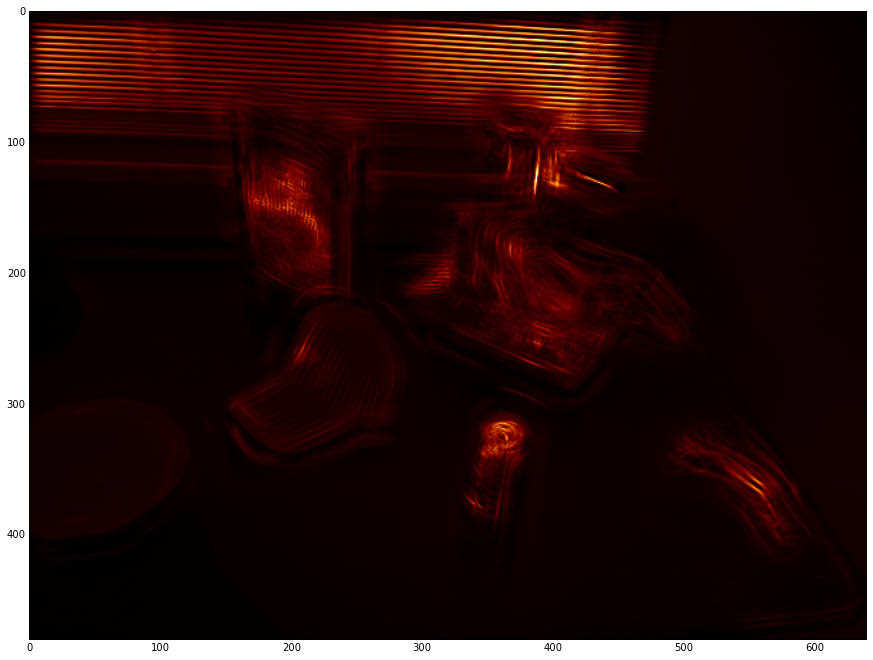

In [48]:
alpha = 0.03
beta = 1.0-alpha
gamma = 0.0
blend4 = cv2.addWeighted(gimg4.astype(np.float32)/255.0, alpha, smag4, beta, gamma)
blend3 = cv2.addWeighted(gimg3.astype(np.float32)/255.0, alpha, smag3, beta, gamma)
blend2 = cv2.addWeighted(gimg2.astype(np.float32)/255.0, alpha, smag2, beta, gamma)
blend = cv2.addWeighted(gimg.astype(np.float32)/255.0, alpha, smag, beta, gamma)


plt.figure(figsize=(15,15))
plt.imshow(blend4, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend3, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend2, cmap="afmhot")
plt.figure(figsize=(15,15))
plt.imshow(blend, cmap="afmhot")

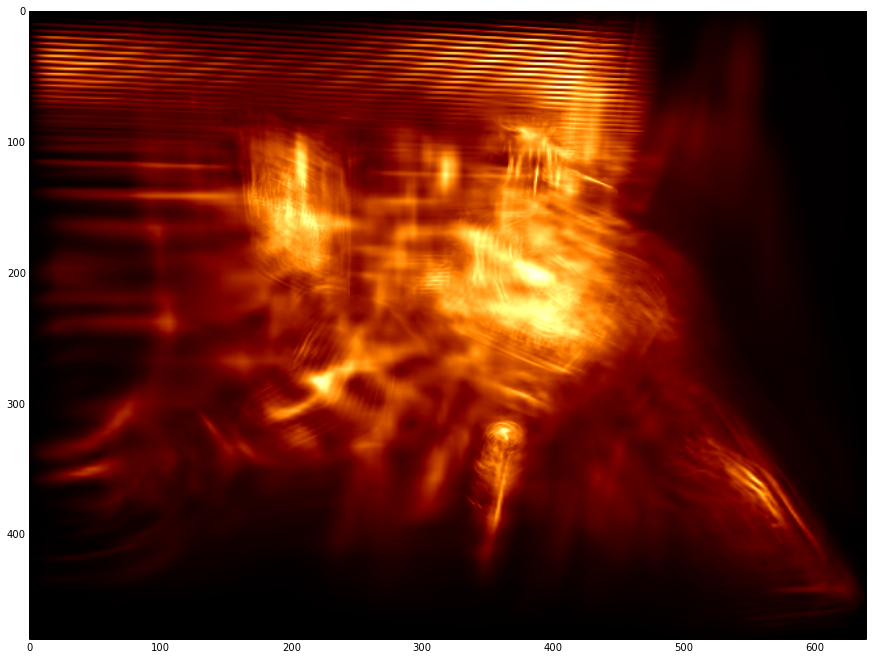

In [49]:
#out4 = np.zeros_like(smag)
#out3 = np.zeros_like(smag)
#out2 = np.zeros_like(smag)
out4 = cv2.resize(smag4,(640,480))
out4 = out4 / np.amax(out4)
out3 = cv2.resize(smag3, (640,480))
out3 = out3 / np.amax(out3)
out2 = cv2.resize(smag2, (640,480))
out2 = out2 / np.amax(out2)
out = smag / np.amax(smag)

collected = out4 + out3 + out2 + out
collected = collected * .25
plt.figure(figsize=(15,15))
plt.imshow(collected, cmap="afmhot")